### Описание работы
Мы получили датасет о поездках в такси Uber. Содержащий 200000 наблюдений с 9 признаками. Необходимо построить модель для прогнозирования стоимости поездок. Ilnur©, Ilya© - Ufa, 2025.

### Стадии работы
Работа состоит из:
- Подключение модулей
  
- Загрузка данных
  
- Предварительная обработка данных

- Разведочный анализ данных

- Построение моделей

- Подведение итогов работы

### Подключение модулей

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# Импорт необходимых библиотек для работы с графиками и датасетом,
# также используя иснтрумент filterwarnings из библиотеки warnings для избегания вывода сообщения "Future warning"

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Импорт инструментов регрессиных моделей из библитоки sclearn

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Также импортируем инструменты для подготовки датасета к работе с регрессивными моделями

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Для ознакомления с результатми обучения импортируем метрики из той же библиотеки sclearn

### Загрузка данных

In [108]:
df = pd.read_csv('uber.csv') 
# Присвоение записей в переменную хранения датасета

In [109]:
df.head()
# Просмотр первых 10-ти записей

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


`key` - уникальный идентификатор для каждой поездки

`fare_amount` - стоимость каждой поездки в долларах США (Целевая переменная)

`pickup_datetime` - дата и время включения счетчика

`passenger_count` - количество пассажиров в транспортном средстве (введенное водителем значение)

`pickup_longitude` - долгота, на которой был включен счетчик

`pickup_latitude` - широта, на которой был включен счетчик

`drop_longitude` - долгота, на которой был отключен счетчик

`drop_latitude` - широта, на которой был отключен счетчик

In [110]:
df.shape # Размерность набора данных

(200000, 9)

In [111]:
df.info() # Получаем общую информаию о записях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [112]:
df.describe(include='all') # Проводим небольшой анализ всех признаков датасета

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,200000,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 19:52:06.0000003,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771250e+07,NaN,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,NaN,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


### Первичный вывод после просмотра предоставленных данных


__Набор данных содержит 200 000 записей 2 из которых пустые, 9 признаков, типы данных: int, float и object. Присутвуют аномальные данные__

### Предварительная обработка данных

In [113]:
df.drop(["Unnamed: 0", "key"], axis=1, inplace=True) # Удаление признаков в связи с их неинформативностью
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [114]:
df.isna().sum() # Проверка на пустые записи

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [115]:
df.duplicated().sum() # проверка на дублированные записи

0

In [116]:
df.dropna(inplace=True)
df = df.reset_index(drop=True) # Удаление 2 пустых записей

In [117]:
df.shape # проверка размерности после удаления

(199999, 7)

In [118]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()
# Перевод записей типа object в соответствующий ему тип, в данном случае — datetime.

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [119]:
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour

df.head()
# Разделение одного признака на категори: год, месяц, день недели, час

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [123]:
df[df['fare_amount'] <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
20744,0.00,2015-04-22 23:25:07+00:00,-73.658897,40.805199,-73.658897,40.805199,1,2015,4,2,23
22182,0.00,2010-03-20 02:59:51+00:00,-73.994366,40.755395,-73.998718,40.854853,2,2010,3,5,2
63395,-5.00,2015-03-03 23:07:41+00:00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,1,23
71246,-3.30,2010-02-11 21:47:10+00:00,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,3,21
79903,-3.50,2015-05-01 14:43:02+00:00,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,4,14
87467,0.00,2015-01-04 03:51:13+00:00,-73.969475,40.807503,0.000000,0.000000,2,2015,1,6,3
89321,-49.57,2010-03-09 08:26:10+00:00,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,1,8
92062,-23.70,2010-03-12 08:49:10+00:00,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,4,8
98874,-52.00,2015-03-20 21:31:14+00:00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,4,21
104079,-7.30,2010-03-09 20:25:10+00:00,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,1,20


In [124]:
drop_fare_indices = df[df['fare_amount'] <= 0].index
df.drop(drop_fare_indices, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df[df['fare_amount'] <= 0].count()
# Просмотр некорректных значений в поле `fare_amount` и удаление записей соответсвующих условию

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_year          0
pickup_month         0
pickup_weekday       0
pickup_hour          0
dtype: int64

## Справка о доступных тарифах в агрегаторе такси Uber:

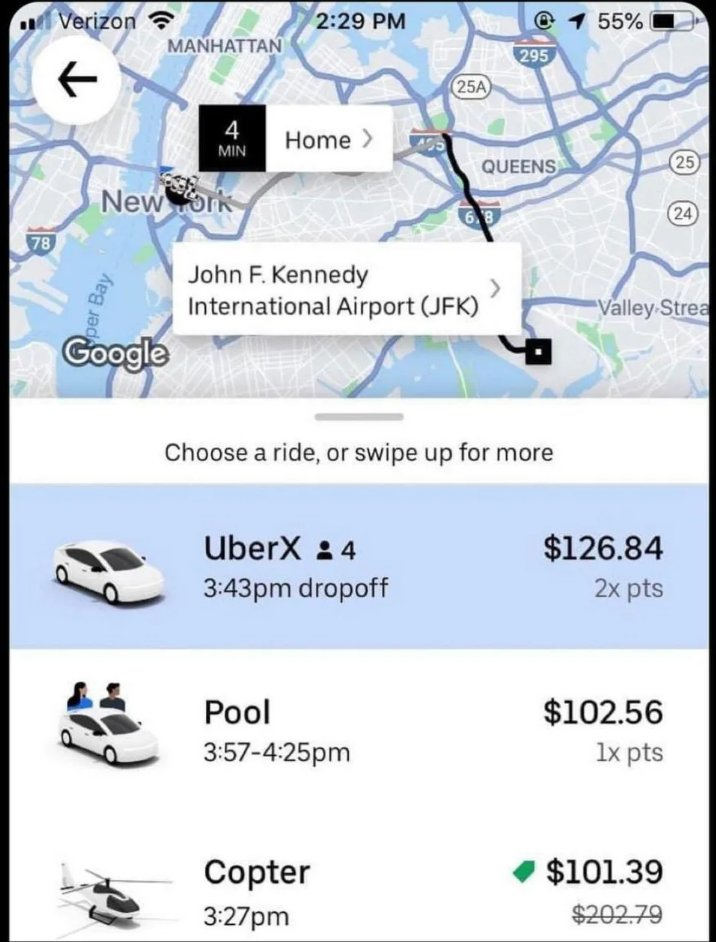

In [125]:
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180) & (df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180) & (df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90) & (df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]
df.head()
# Определяем новый набор данных состоящий из реальных данных широты и долготы и выводим первые 10 записей

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [126]:
df[df['passenger_count'] > 6]
# По данным из источника Uber в такси могут быть максимально 6 пассжиров - Тарифы Минивэн. Просматриваем некорректные данные

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
113026,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208,2010,12,1,8


In [127]:
drop_passenger_count = df[df['passenger_count'] > 6].index
df.drop(drop_passenger_count, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True) # Удаление некорретных записей

In [128]:
df[df['passenger_count'] <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
333,10.1,2011-08-05 07:03:08+00:00,-74.013900,40.707800,-73.992300,40.749300,0,2011,8,4,7
908,11.7,2011-09-06 12:25:19+00:00,-73.981000,40.764600,-73.962900,40.778400,0,2011,9,1,12
926,3.3,2012-03-26 18:11:24+00:00,-73.979978,40.765821,-73.983894,40.766873,0,2012,3,0,18
2000,15.7,2012-04-20 15:07:57+00:00,-73.975285,40.750138,-73.974729,40.783151,0,2012,4,4,15
3011,6.1,2012-01-07 19:19:08+00:00,-73.977900,40.789100,-73.983700,40.773600,0,2012,1,5,19
...,...,...,...,...,...,...,...,...,...,...,...
196763,3.3,2011-01-17 15:52:26+00:00,-74.000760,40.757637,-74.004852,40.751947,0,2011,1,0,15
197069,7.3,2011-12-10 15:33:12+00:00,0.000000,0.000000,0.000000,0.000000,0,2011,12,5,15
198837,5.7,2011-09-20 19:55:05+00:00,-73.980300,40.742800,-73.967900,40.755600,0,2011,9,1,19
198867,12.1,2011-08-22 21:10:56+00:00,-73.996700,40.737200,-74.008500,40.704000,0,2011,8,0,21


In [129]:
drop_passenger_count = df[df['passenger_count'] <= 0].index
df.drop(drop_passenger_count, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [130]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
count,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000
mean,11.369376,-72.504173,39.919172,-72.514408,39.923484,1.689440,2011.743712,6.283464,3.049369,13.492793
std,9.905986,10.442243,6.127757,10.403044,6.114307,1.305386,1.859075,3.438457,1.946786,6.516099
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992063,40.734794,-73.991409,40.733828,1.000000,2010.000000,3.000000,1.000000,9.000000
50%,8.500000,-73.981825,40.752582,-73.980094,40.753041,1.000000,2012.000000,6.000000,3.000000,14.000000
75%,12.500000,-73.967162,40.767155,-73.963663,40.767995,2.000000,2013.000000,9.000000,5.000000,19.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000


In [131]:
df[(df['pickup_longitude'] == df['dropoff_longitude']) & (df['pickup_latitude'] == df['dropoff_latitude'])]
# Новый DataFrame, содержащий только те строки,
# где координаты места подачи и высадки совпадают,
# что может указывать на случаи, когда пассажир не перемещался

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2
7,2.5,2012-12-11 13:52:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2012,12,1,13
11,8.5,2011-05-23 22:15:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2011,5,0,22
48,56.8,2013-01-03 22:24:41+00:00,-73.993498,40.764686,-73.993498,40.764686,1,2013,1,3,22
65,6.0,2014-05-05 19:27:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2014,5,0,19
...,...,...,...,...,...,...,...,...,...,...,...
199137,6.5,2014-02-22 06:45:46+00:00,0.000000,0.000000,0.000000,0.000000,1,2014,2,5,6
199140,12.5,2012-09-10 17:39:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2012,9,0,17
199174,4.5,2013-06-24 22:17:43+00:00,-73.793768,40.656939,-73.793768,40.656939,1,2013,6,0,22
199189,24.9,2011-03-22 13:59:00+00:00,-73.974618,40.756295,-73.974618,40.756295,5,2011,3,1,13


In [132]:
df[(df['pickup_longitude'] == 0.0) & (df['pickup_latitude'] == 0.0)]
# Аналогично

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
7,2.5,2012-12-11 13:52:00+00:00,0.0,0.0,0.0,0.0,1,2012,12,1,13
11,8.5,2011-05-23 22:15:00+00:00,0.0,0.0,0.0,0.0,1,2011,5,0,22
65,6.0,2014-05-05 19:27:00+00:00,0.0,0.0,0.0,0.0,1,2014,5,0,19
92,6.1,2011-12-02 14:07:00+00:00,0.0,0.0,0.0,0.0,1,2011,12,4,14
120,6.5,2010-08-20 19:39:48+00:00,0.0,0.0,0.0,0.0,1,2010,8,4,19
...,...,...,...,...,...,...,...,...,...,...,...
198975,4.9,2011-08-19 07:16:00+00:00,0.0,0.0,0.0,0.0,1,2011,8,4,7
198981,7.5,2013-10-11 11:25:41+00:00,0.0,0.0,0.0,0.0,1,2013,10,4,11
199137,6.5,2014-02-22 06:45:46+00:00,0.0,0.0,0.0,0.0,1,2014,2,5,6
199140,12.5,2012-09-10 17:39:00+00:00,0.0,0.0,0.0,0.0,2,2012,9,0,17


In [133]:
drop_passenger_count = df[(df['pickup_longitude'] == 0.0) & (df['pickup_latitude'] == 0.0)].index
df.drop(drop_passenger_count, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
# В связи с малым количеством таких записей, было принято решение из удлаить

In [134]:
def haversine_distance(row):
        R = 6371.0
        lat1, lon1 = np.radians(row['pickup_latitude']), np.radians(row['pickup_longitude'])
        lat2, lon2 = np.radians(row['dropoff_latitude']), np.radians(row['dropoff_longitude'])
        
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        
        a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        
        return R * c

df['distance_km'] = df.apply(haversine_distance, axis=1)
df['distance_km']
# в результате выполнения этого кода в DataFrame df будет добавлен новый столбец,
# содержащий расстояние в километрах между местом подачи и местом высадки для каждой записи.

0          1.683323
1          2.457590
2          5.036377
3          1.661683
4          4.475450
            ...    
195493     0.112210
195494     1.875050
195495    12.850319
195496     3.539715
195497     5.417783
Name: distance_km, Length: 195498, dtype: float64

In [135]:
df['distance_km'].describe()

count    195498.000000
mean         12.335308
std         269.147296
min           0.000000
25%           1.256368
50%           2.159861
75%           3.919229
max        8708.233063
Name: distance_km, dtype: float64

In [136]:
df[df['distance_km'] > 50] # Просмотри и удаление записей в который дистанция "путешествия" превышает 50 км

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
1044,52.00,2014-02-02 22:27:00+00:00,-73.781095,40.645015,0.000000,0.000000,1,2014,2,6,22,8647.035598
1495,2.50,2014-05-12 12:00:15+00:00,-74.001849,40.715156,0.000000,0.000000,3,2014,5,0,12,8666.772408
1902,7.00,2013-02-10 16:18:00+00:00,-0.131667,40.757063,-73.991593,40.749953,1,2013,2,6,16,6021.114289
2120,5.70,2012-07-21 12:16:00+00:00,-1.216667,40.748597,-74.004822,40.734670,1,2012,7,5,12,5941.059801
3377,11.50,2013-01-16 22:13:00+00:00,0.000000,40.767907,-73.996505,40.727322,1,2013,1,2,22,6032.019623
...,...,...,...,...,...,...,...,...,...,...,...,...
189160,57.33,2013-08-29 13:02:00+00:00,-73.899020,40.886205,0.000000,0.000000,1,2013,8,3,13,8661.779758
193407,7.00,2014-11-18 22:10:03+00:00,-73.962190,40.759158,0.000000,0.000000,1,2014,11,1,22,8664.389119
194100,23.50,2013-10-21 01:28:00+00:00,-73.968115,40.801455,0.000000,0.000000,2,2013,10,0,1,8665.747167
194196,20.10,2012-06-26 21:29:00+00:00,-0.116667,40.729775,0.000000,0.000000,5,2012,6,1,21,4528.959683


In [137]:
drop_passenger_count = df[df['distance_km'] > 50].index
df.drop(drop_passenger_count, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [138]:
df['distance_m'] =  df['distance_km'] * 1000


In [139]:
df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance_km', 'pickup_datetime'], axis=1, inplace=True)
df.head()

,fare_amount,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_m
0,7.5,1,2015,5,3,19,1683.322752
1,7.7,1,2009,7,4,20,2457.589884
2,12.9,1,2009,8,0,21,5036.377190
3,5.3,3,2009,6,4,8,1661.683458
4,16.0,5,2014,8,3,17,4475.449963


### Общий вывод после предобработки данных

__Были обнаружены данные с пустыми значениями, и по необходимости - удалены. `pickup_datetime` - тип данных изменен с object на date. Данные распределены неравномерно.__

### Разведочный анализ данных

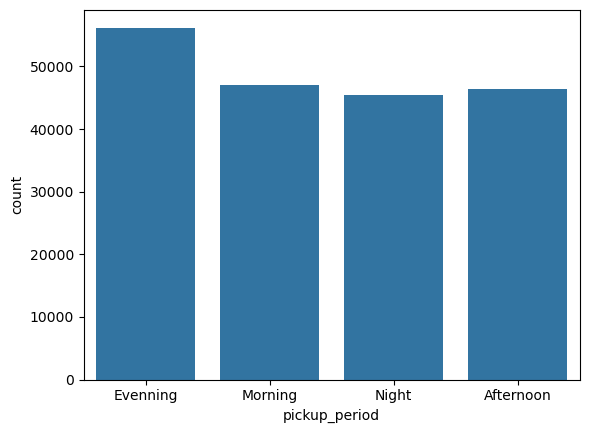

In [207]:
sns.countplot(x='pickup_period', data=df)
plt.show()

__В большинстве случаев заказы приходятся на вечернее время__

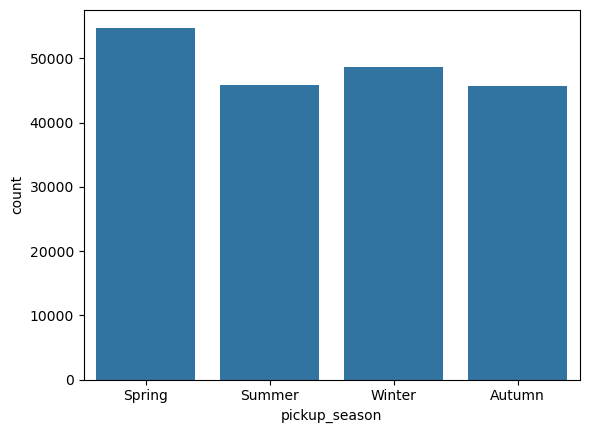

In [208]:
sns.countplot(x='pickup_season', data=df)
plt.show()

__В большинстве случаев заказы приходятся на весеннее время__

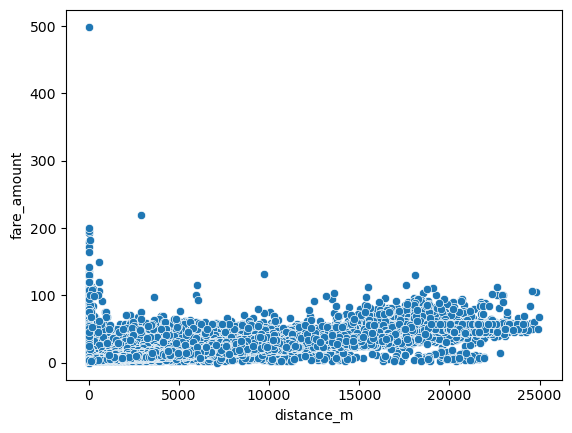

In [209]:
sns.scatterplot(x=df['distance_m'], y=df['fare_amount'])
plt.show()

__Прослеживается зависимсоть цены от дистанции__

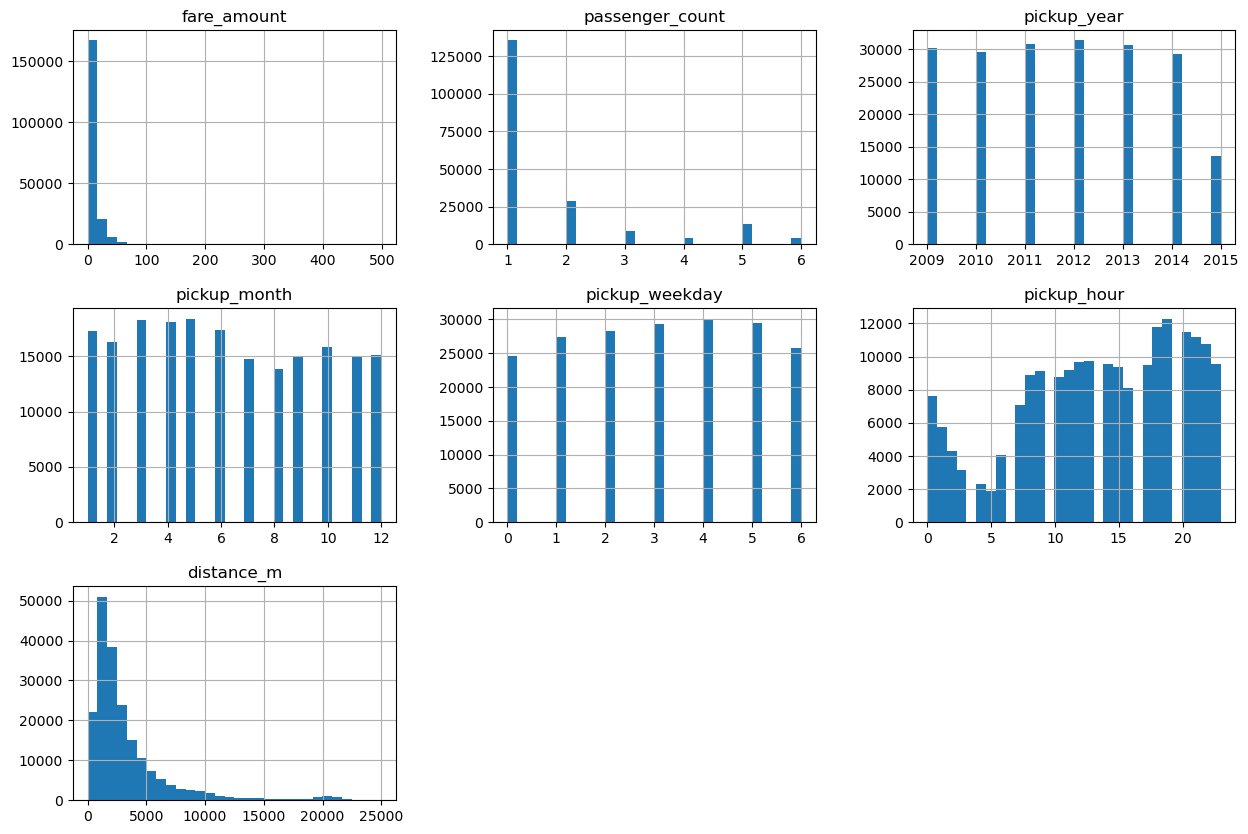

In [210]:
df.hist(figsize = (15,10), bins = 30);

__Чаще всего заказывает один человек в вечернее время в четверг или пятницу, весной на 500-2500 метров со средним итоговым чеком в размере 0-15$. Наибольшее кол-во заказов Uber пришлось на 2012 год, но тенденция не сбивается.__

<Figure size 800x600 with 0 Axes>

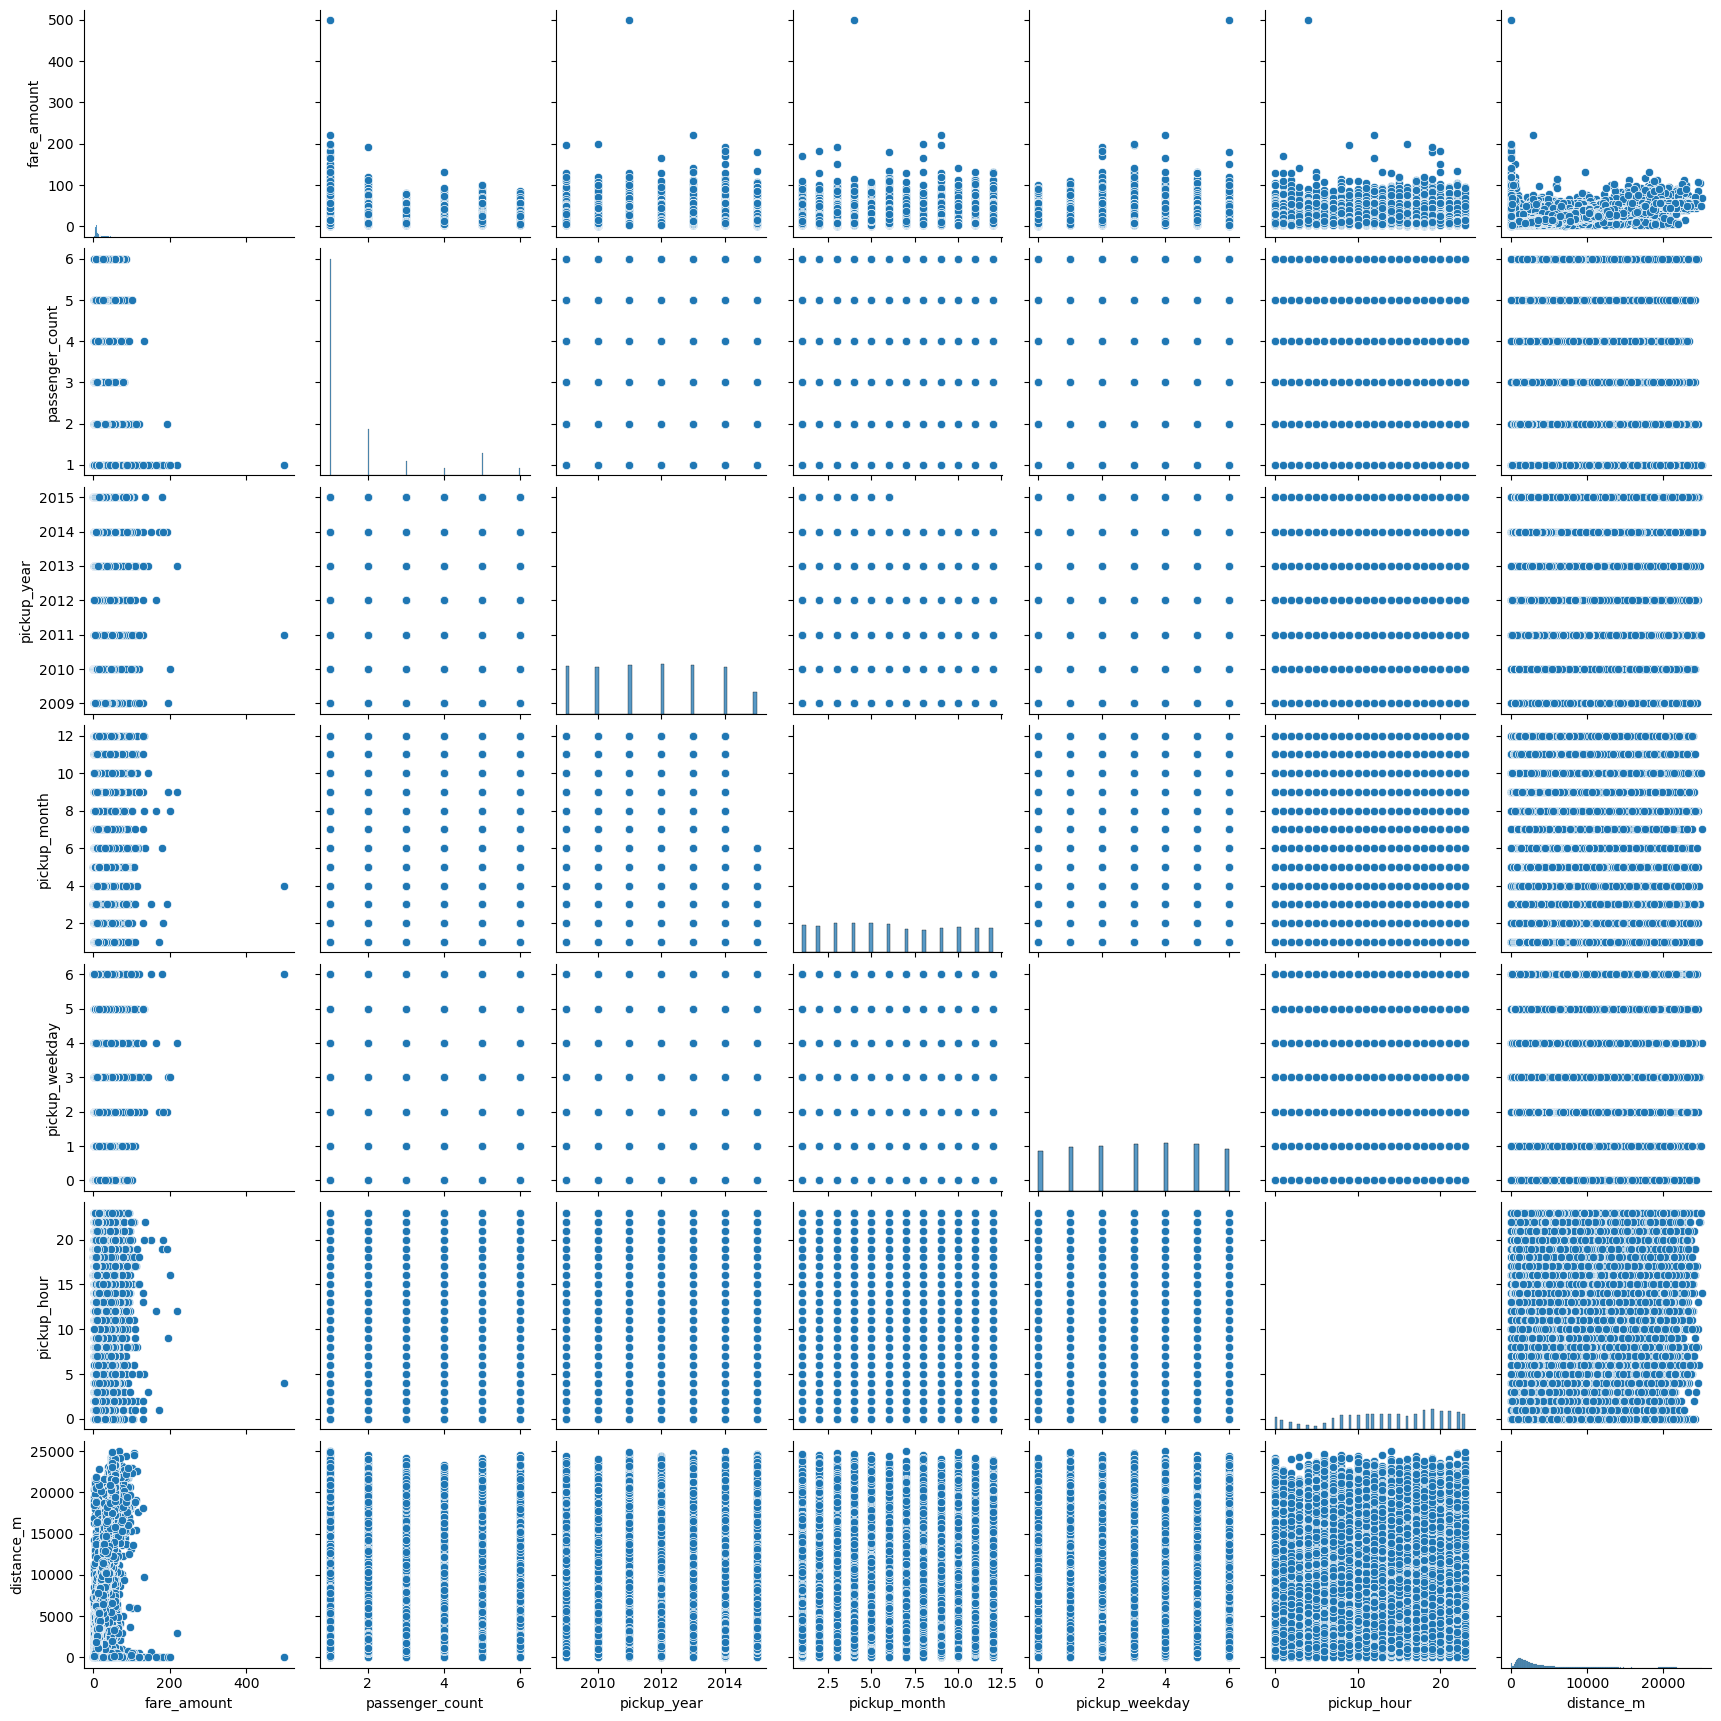

In [211]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

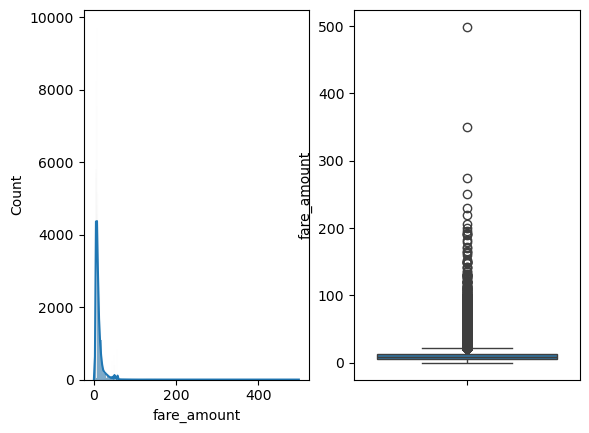

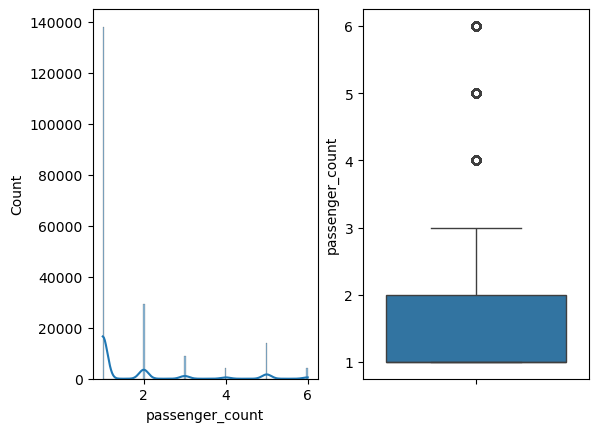

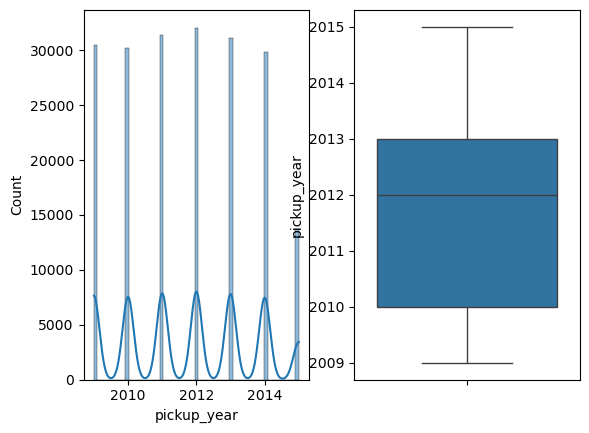

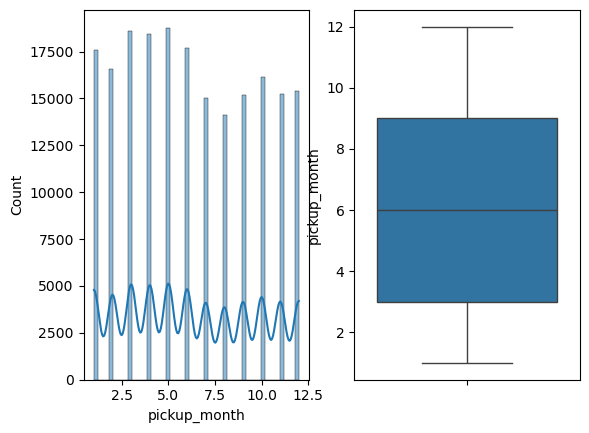

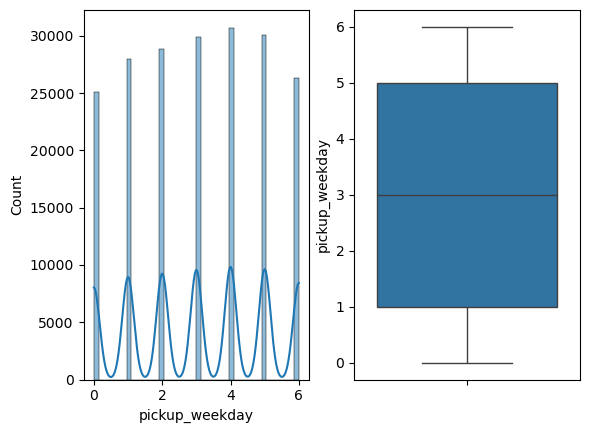

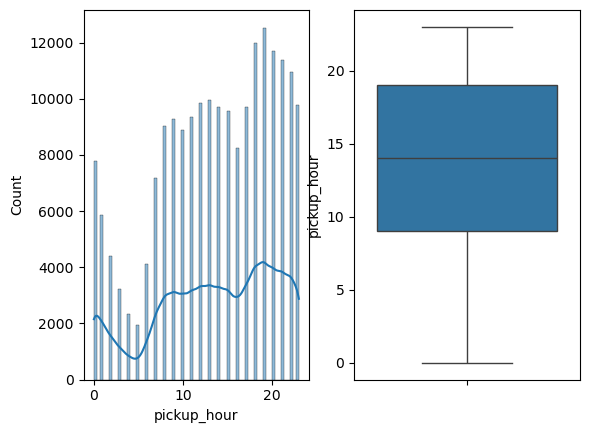

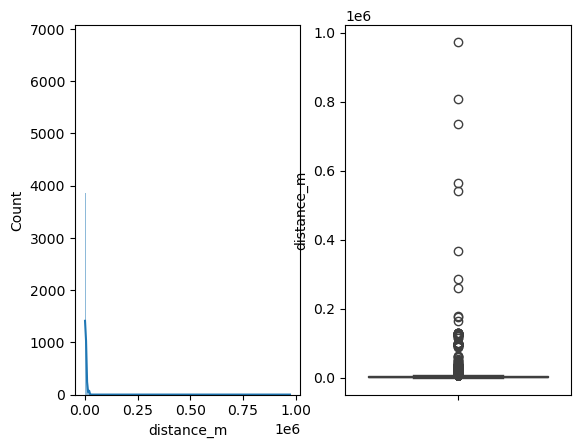

In [101]:
num_cols = ['fare_amount', 'passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday',	'pickup_hour',	'distance_m']
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])
    plt.show()
# Больше непонятных графиков! :D

<Axes: >

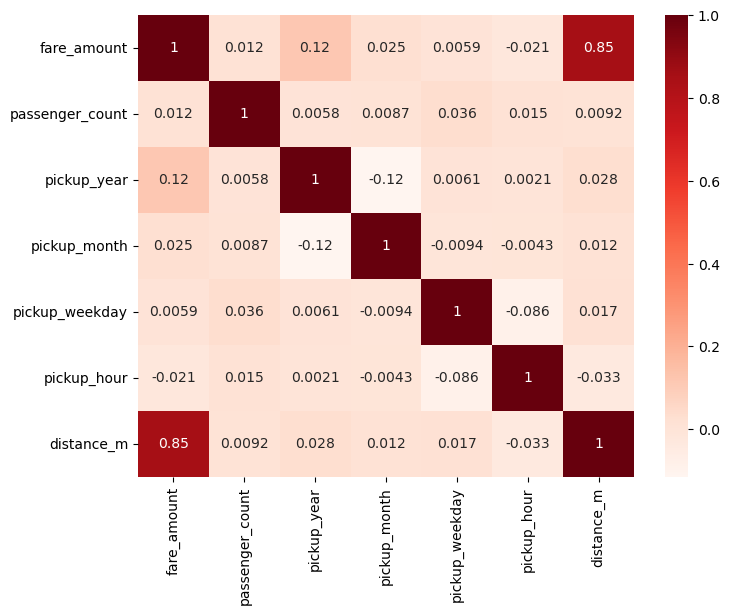

In [213]:
df_nums = df.select_dtypes(exclude=["object"])
plt.figure(figsize=(8,6))
sns.heatmap(df_nums.corr(), annot=True, cmap='Reds')

__На hitmap`е видна отличная зависимость между дистанцией и ценой__

In [219]:
scaler = MinMaxScaler(feature_range=(1,4)) # Масштабирование данных перед началом обучения моделей, для лучшего обучения
nrm = scaler.fit_transform(df[['distance_m', 'passenger_count', 'pickup_year',	'pickup_month',	'pickup_weekday',	'pickup_hour',]])
nrm = pd.DataFrame(nrm, columns=['distance_m', 'passenger_count', 'pickup_year',	'pickup_month',	'pickup_weekday',	'pickup_hour',])
nrm = pd.concat([nrm, df[['fare_amount', 'pickup_season_Autumn',	'pickup_season_Spring',	'pickup_season_Summer',	'pickup_season_Winter',	'pickup_period_Afternoon',	'pickup_period_Evenning',	'pickup_period_Morning',	'pickup_period_Night']]], axis=1)
nrm

,distance_m,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,fare_amount,pickup_season_Autumn,pickup_season_Spring,pickup_season_Summer,pickup_season_Winter,pickup_period_Afternoon,pickup_period_Evenning,pickup_period_Morning,pickup_period_Night
0,1.202045,1.0,4.0,2.090909,2.5,3.478261,7.5,0,1,0,0,0,1,0,0
1,1.294978,1.0,1.0,2.636364,3.0,3.608696,7.7,0,0,1,0,0,1,0,0
2,1.604503,1.0,1.0,2.909091,1.0,3.739130,12.9,0,0,1,0,0,1,0,0
3,1.199447,2.2,1.0,2.363636,3.0,2.043478,5.3,0,0,1,0,0,0,1,0
4,1.537176,3.4,3.5,2.909091,2.5,3.217391,16.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195081,1.013468,1.0,2.5,3.454545,4.0,2.304348,3.0,1,0,0,0,0,0,1,0
195082,1.225057,1.0,3.5,1.545455,3.0,1.130435,7.5,0,1,0,0,0,0,0,1
195083,2.542389,1.6,1.0,2.363636,1.0,1.000000,30.9,0,0,1,0,0,0,0,1
195084,1.424862,1.0,4.0,2.090909,2.0,2.826087,14.5,0,1,0,0,1,0,0,0


### Построение моделей
#### Выбраны для моделей: LinearRegression; DecisionTreeRegressor; RandomForestRegressor

### LinearRegression

In [227]:
X = nrm.drop('fare_amount',axis=1)
y = nrm['fare_amount']

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [231]:
reg = LinearRegression()

In [233]:
reg.fit(X_train,Y_train)

LinearRegression()

In [235]:
y_pred=reg.predict(X_test)

In [237]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,y_pred))

mean_Absolute-Error 2.283313368153012


In [239]:
print('mean-squared-error',metrics.mean_squared_error(Y_test,y_pred))

mean-squared-error 21.7022283883955


In [241]:
print('r2score',metrics.r2_score(Y_test,y_pred))

r2score 0.7541086068502597


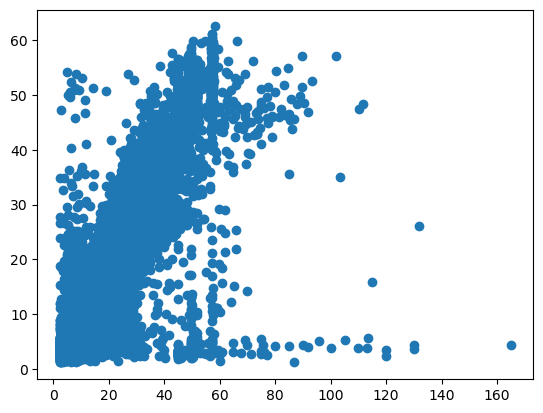

In [243]:
plt.scatter(Y_test,y_pred)

__По r2-score модель `LinearRegression` хорошо обучилась. На графике это показано более наглядно__ 

In [245]:
kf = KFold(10)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [247]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.75314889 0.64232172 0.70183963 0.7369342  0.76541378 0.73596306
 0.75662446 0.74338039 0.73484636 0.77584615]
Train CV mean : 0.735


In [249]:
kf = KFold(5)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [251]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.69413549 0.7188659  0.75068134 0.74977795 0.75530952]
Train CV mean : 0.734


__В результате выполнения этого кода вы получите среднее значение R2-score, которое позволяет оценить, насколько хорошо ваша регрессионная модель работает на данных. Кросс-валидация помогает избежать переобучения и дает более надежную оценку производительности модели, так как она тестируется на разных подмножествах данных.__

### DecisionTreeRegressor

In [254]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [256]:
Y_pred = decision_tree_regressor.predict(X_test)

In [258]:
mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(np.sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

In [260]:
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6.678
R-squared value of the model is : 0.495


In [262]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,Y_pred))
print('mean-squared-error',metrics.mean_squared_error(Y_test,Y_pred))
print('r2score',metrics.r2_score(Y_test,Y_pred))

mean_Absolute-Error 3.0433401394252124
mean-squared-error 44.60111533207464
r2score 0.49465878854632706


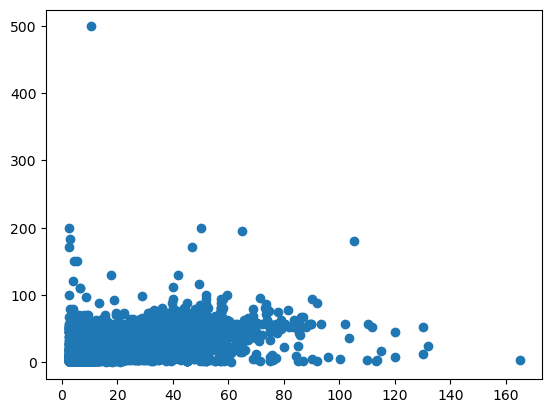

In [264]:
plt.scatter(Y_test,Y_pred)

__В отличии от `LinearRegression` модель `DecisionTreeRegressor` предоставила результаты похуже: по R&sup2;: 0,49, по mean-squared-error 44.6 и mean_Absolute-Error 3.04. График это подтверждает__

### RandomForestRegressor

In [267]:
from sklearn.ensemble import RandomForestRegressor

tree_3 = RandomForestRegressor(random_state=1, max_depth=9)
tree_3.fit(X_train, Y_train)
pred_train = tree_3.predict(X_train)
pred_test = tree_3.predict(X_test)

print(f'Train R2 {r2_score(Y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(Y_test, pred_test):.2f}')

Train R2 0.82
Test R2 0.79


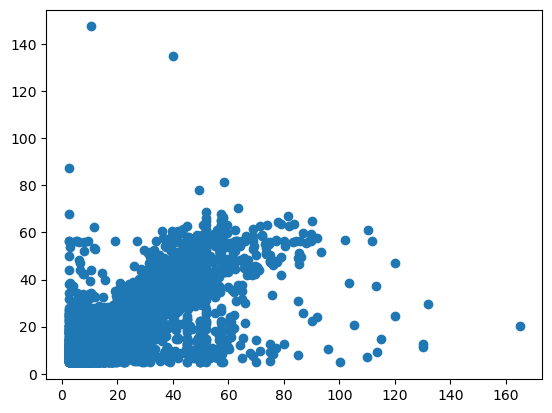

In [268]:
plt.scatter(Y_test, pred_test)

__Модель `RandomForestRegressor` показала себя лучше чем прошлая: 
Train R2 0.82
Test R2 0.79. На графике прослеживается стремление к изогнутости.__

In [271]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test, pred_test))

mean_Absolute-Error 2.0886184478826846


In [273]:
print('mean-squared-error',metrics.mean_squared_error(Y_test, pred_test))

mean-squared-error 18.897226048286633


In [275]:
print('r2score',metrics.r2_score(Y_test, pred_test))

r2score 0.7858899484182278


### Общий вывод

__В ходе работы были выполнены следующие ключевые шаги:__
1.  __Были обнаружены данные с пустыми значениями, и по необходимости - удалены. `pickup_datetime` - тип данных изменен с object на date__
2.  __Вычисление расстояний: Реализована функция для вычисления расстояний между координатами, что важно для анализа данных.__
3.  __Нормализация данных: Использован `MinMaxScaler` для приведения числовых признаков к диапазону от 1 до 4, что улучшает работу моделей машинного обучения.__
4.  __Было выявлено что чаще всего заказывает один человек в вечернее время в четверг или пятницу, весной на 10-500 км со средним итоговым чеком в размере 0-15$. Наибольшее кол-во заказов Uber пришлось на 2012 год, но тенденция не сбивается.__
5.  __На hitmap`е обработанного датасета была зафиксирована отличная зависимость между дистанцией и ценой__
6.  __Очень хорошо обученой моделью оказалась `LinearRegression` с отличным графиком и результатми: `r2score` 0.75, `mean-squared-error` 21.7, `mean_Absolute-Error` 2.28__

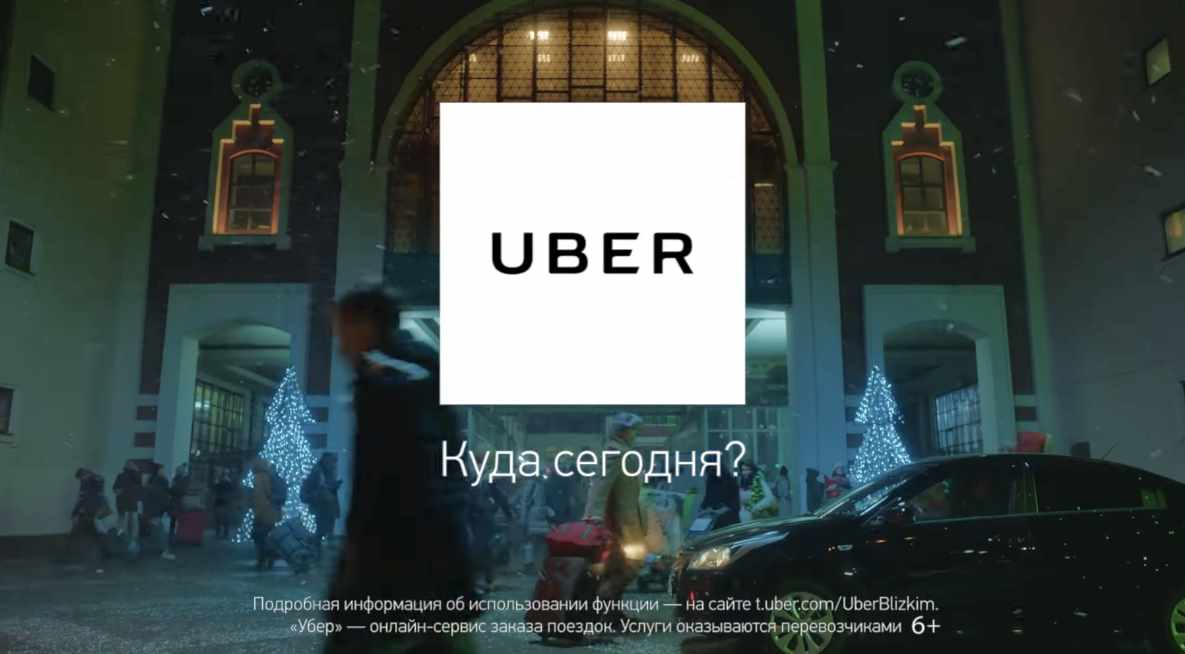